# Table of Content - Customer Service Study

### [Lab case Study](#00)

### [Libraries](#000)

### [Pipeline](#0)


### [Statistic tasks](#aa)


### [Linear Regression](#g)


### [Model Validation](#h)


# Lab Case Study <a class="anchor" id="00"></a>

### Scenario

You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Business Objectives

- Retain customers,
- analyze relevant customer data,
- develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.


### Instructions
- In this lab, we will model our data. Import sklearn train_test_split and separate the data.
- Try a simple linear regression with all the data to see whether we are getting good results.
- Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
- Use the function to check LinearRegressor,Lasso,Ridge and KNeighborsRegressor.
- Use feature selection techniques to select subset of features to train the model with(if necessary).
- Check and discuss the results.

----

# Libraries <a class="anchor" id="000"></a>

In [127]:

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from numpy import random
#import getpass #just needed for sql import
#import sqlalchemy as sa #just needed for sql import
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
from matplotlib import pyplot
from numpy import sqrt
from numpy import log

# Pipeline <a class="anchor" id="0"></a>
Functions & Pipeline

In [128]:
#cleaning the state names
def st_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        states= {'Arizona' : 'AZ', 
                 'California': 'CA',
                 'Nevada' : 'NV', 
                 'Cali' :'CA,', 
                 'Oregon':'OR', 
                 'AZ' :'AZ', 
                 'WA':'WA',
                 'Washington':'WA',
                 'Cali':'CA'}
        
        return states[x]
    


In [129]:
#cleaning the gender names
def gender_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        g = {'F': 'F', 
                 'M' : 'M', 
                 'Femal': 'F',
                 'Male' : 'M', 
                 'female' :'F'}
        
        return g[x]

In [130]:
#change states into regions
def state_region(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        region= {'AZ': 'Central', 
                  'CA': 'West',
                 'NV': 'Central', 
                 'OR':'North_West', 
                  'AZ':'Central', 
                 'WA':'East'}
        
        return region[x]
    

In [131]:
# loading csv into dataframe
def load_data(path):
    return pd.read_csv(path)

#cleaning

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns] #all columns in lower case
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer"]) #dropping useless columns
    #df=df[df['income']>0]
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce') # change format of date
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"])) #get frm effective_to_date just the months
    df=df.drop(columns=['effective_to_date']) #dropping not anymore needed column
    df["state"] = df["state"].apply(st_clean)
    df["gender"] = df["gender"].apply(gender_clean)
    df =df.drop_duplicates()
    df['customer_lifetime_value'].fillna(df["customer_lifetime_value"].mean(),inplace=True) # filling empty cells with the mean
    df['income'].fillna(df["income"].mean(),inplace=True)
    df['monthly_premium_auto'].fillna(df["monthly_premium_auto"].mean(),inplace=True)
    df['total_claim_amount'].fillna(df["total_claim_amount"].mean(),inplace=True)
    df['number_of_open_complaints'].fillna(df["number_of_open_complaints"].mean(),inplace=True)
    df =df.dropna() #drop if any cell is empty
    df = df.reset_index(drop=True) #reset index
    return df

def transform_data(df):
    df["total_claim_amount"]=round(df["total_claim_amount"],0) #remove decimals
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0) #remove decimals
    df["number_of_open_complaints"]=round(df['number_of_open_complaints'],0) #remove decimals
    df["state"] = df["state"].apply(state_region) # change states into region
    df.vehicle_class[df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df.number_of_policies[df.number_of_policies>2]=3
    return df



In [132]:
cs_study =load_data("Data_Marketing_Customer_Analysis_Round2.csv")

In [133]:
cs_study = clean_data(cs_study)
cs_study = transform_data(cs_study)

<ipython-input-131-9f041d8d1c92>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.vehicle_class[df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
<ipython-input-131-9f041d8d1c92>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.vehicle_class[df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
<ipython-input-131-9f041d8d1c92>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.policy[df.policy.isi

In [134]:
cs_study.head(3)


,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,Central,4809.0,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,West,2229.0,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,East,14948.0,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize,February


In [135]:
#cs_study.to_csv("cs_study_clean.csv")

In [136]:

#cs_study.isnull().sum()

## Plot the Correlation Heatmap. <a class="anchor" id="21"></a>

In [138]:
Var_Corr = cs_study.corr()
# plot the heatmap and annotation on it
#sns.heatmap(Var_Corr,annot=True)


### Function that takes a list of models and train (and test) them

In [139]:

def train_test(df, dependent_column):
    
    data = df.select_dtypes(include=np.number)
    
    data = data.drop(dependent_column, axis =1)
    y =  df[dependent_column]

    #standardizing
    scaler = StandardScaler()
    scaler.fit(data) #z score 
    x = scaler.transform(data) #gives an array
    x = pd.DataFrame(x, columns = data.columns) #transform it to a df
    display(data.head(2))
    print()
    display(x.head(2))
    
    # test_train
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)
    
    lm = LinearRegression()
    model = lm.fit(x_train,y_train)
    predicted_y = model.predict(x_test)
    predicted_train_y = model.predict(x_train)
    print("Coefficient: ", model.coef_)
    print()
    print("Intercept: ", model.intercept_)
   
    
    


In [140]:
train_test(cs_study,'total_claim_amount')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,3
1,2229.0,0,64,3.0,26,0.0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.465260,0.341247,-0.937002,-0.803724,0.141352,-0.423521,1.111832
1,-0.840939,-1.237094,-0.849684,-1.200663,-0.790051,-0.423521,-1.201841


Coefficient:  [-6.97442564e+00 -1.02770618e+02  1.89791654e+02 -3.38706306e+00
 -5.35319413e+00 -1.25381241e-01  9.63505981e-01]

Intercept:  434.7351499542117

r2:  0.48315126937581065


## Model Validation <a class="anchor" id="h"></a>

1. MSE.
    (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
2. RMSE.
    (Root Mean Squared Error) is the error rate by the square root of MSE.
3. MAE.
    (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
4. R2.
    (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [144]:
#mse
mse= mean_squared_error(y_test, predicted_y)

#rmse
rmse = sqrt(mse)

#mae
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, predicted_y)

#r2 another formula is=  model.score(x_test,y_test)
r2 =model.score(x_test,y_test)
print("R2: ", r2)

#adjusted r2
N=x_train.shape[0]
p=36
a = (1-r2)
b = (N-1) / (N-p-1)
adj_rsquared = (1 - (a * b))
print("Adjusted-R2 : " , adj_rsquared)


R2:  0.48315126937581065
Adjusted-R2 :  0.4801704051812463


## Feature Importance
decide on each variable importance on your model using adjusted R_squared 

In [145]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)



In [146]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,0.652088
6,number_of_policies,0.003310
5,number_of_open_complaints,-0.000431
3,months_since_last_claim,-0.011637
4,months_since_policy_inception,-0.018393
0,customer_lifetime_value,-0.023963
1,income,-0.353100


In [71]:
#plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
#plt.title('Feature importances obtained from coefficients')
#plt.xticks(rotation='vertical')
#plt.show()

### Use the function to check LinearRegressor,Lasso,Ridge and KNeighborsRegressor

Text(0.5, 1.0, 'Train Residual histogram')

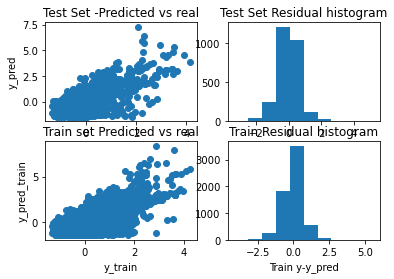

In [149]:
## Linear Regression
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(predicted_y, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - predicted_y)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(predicted_train_y, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - predicted_train_y)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")